In [33]:

# read housing.csv as dataframe
df = pd.read_csv('housing.csv')


In [17]:
df.info

<bound method DataFrame.info of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no

In [20]:
# Check for null values in the dataframe df

df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

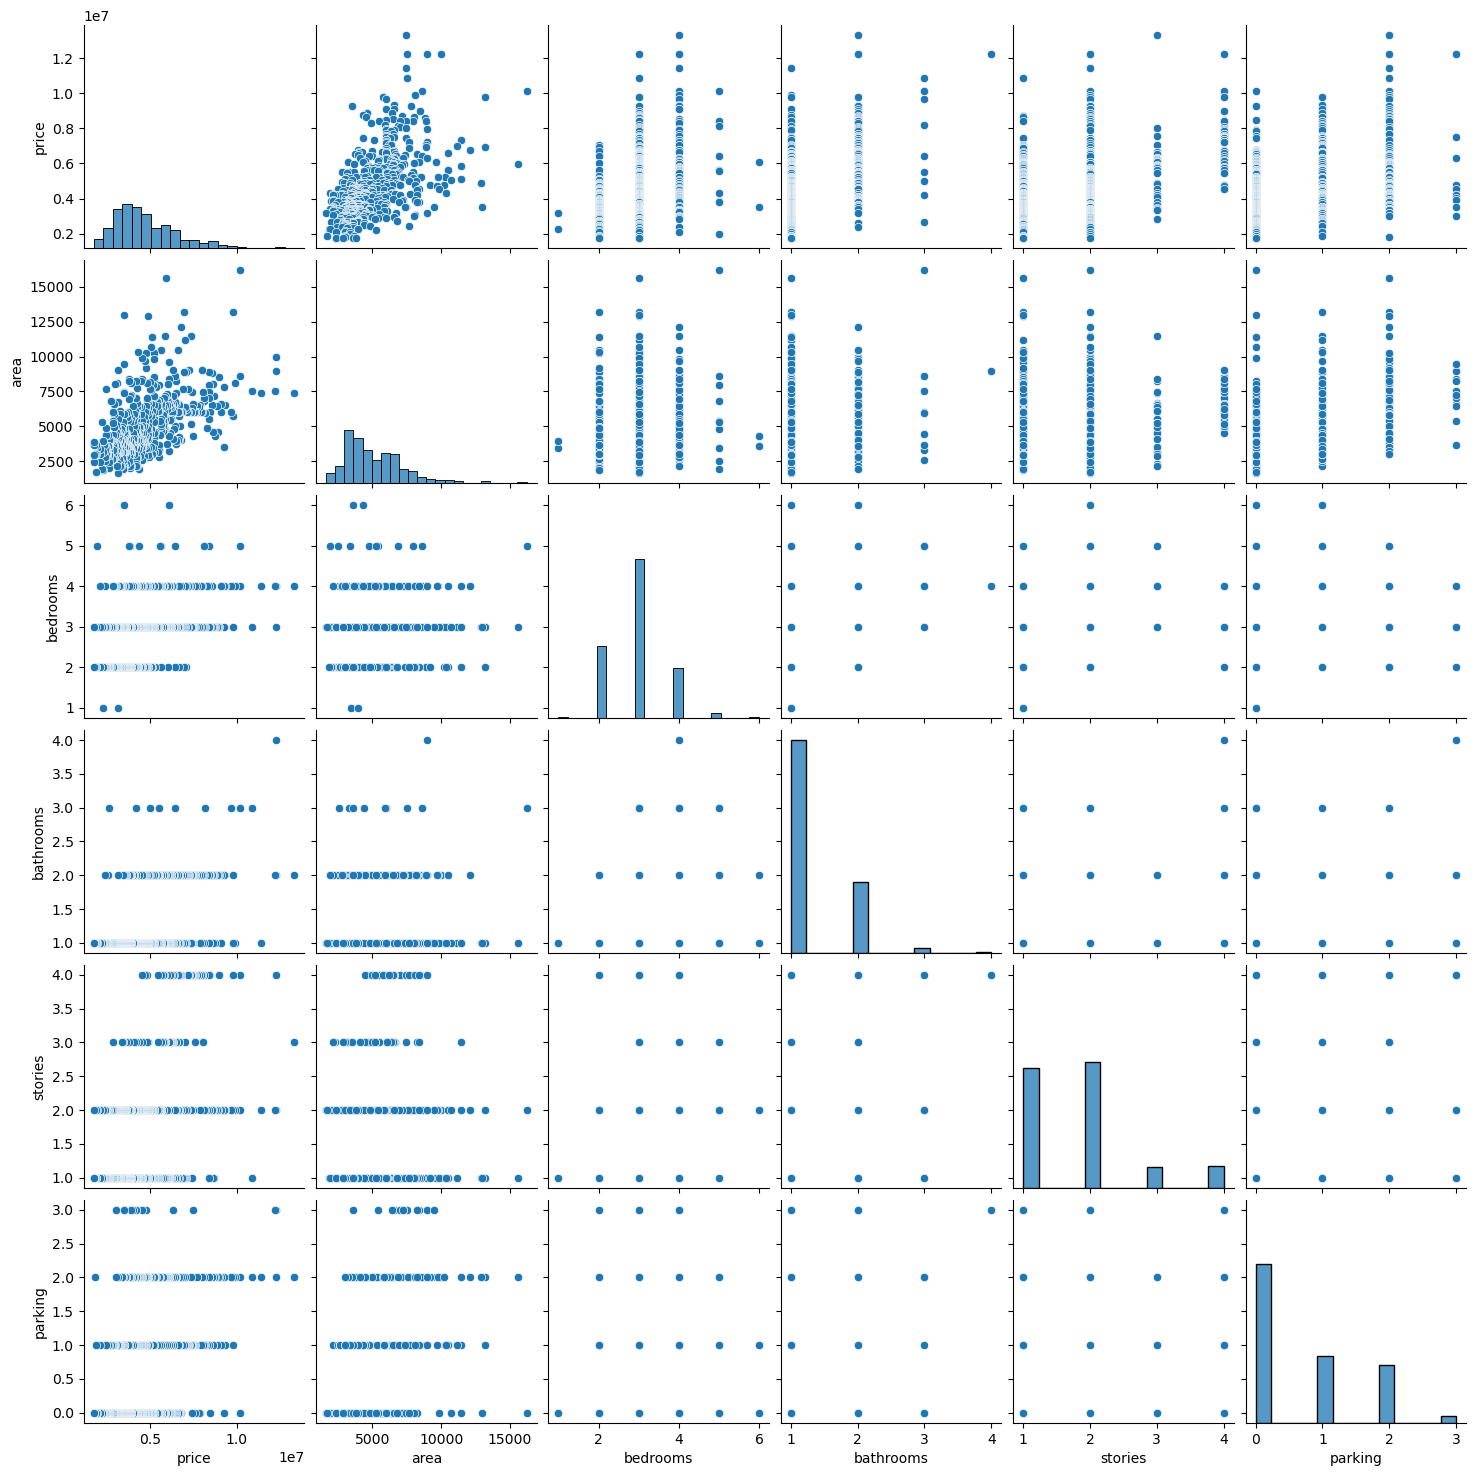

In [21]:
sns.pairplot(df)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_17308\621126171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

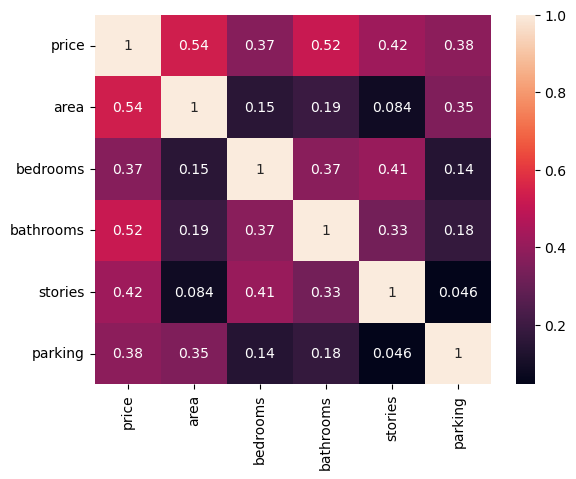

In [24]:
sns.heatmap(df.corr(), annot=True)

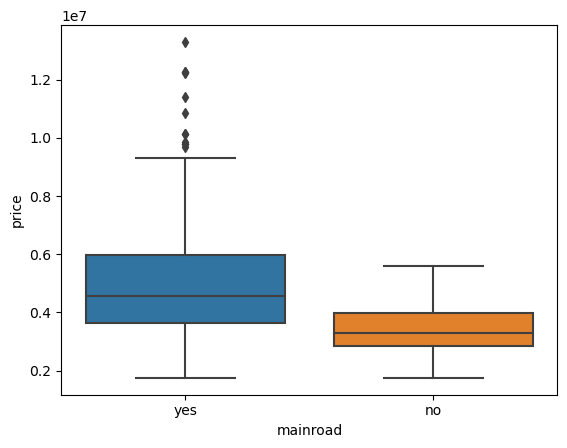

In [25]:
sns.boxplot(x='mainroad',y='price',data=df)
plt.show()

In [26]:
# get list of column names from a dataframe df

df.columns.tolist()
df.describe()



['price',
 'area',
 'bedrooms',
 'bathrooms',
 'stories',
 'mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'parking',
 'prefarea',
 'furnishingstatus']

In [57]:
# df=df.apply(lambda x: x.replace('yes',1))
# df=df.apply(lambda x: x.replace('no',0))
# df=df.apply(lambda x: x.replace('Yes',1))
# df=df.apply(lambda x: x.replace('No',0)) 

# read housing.csv as dataframe
df = pd.read_csv('housing.csv')

df[['mainroad']]=df[['mainroad']].apply(lambda x: x.map({'yes':1,'no':0}))
df[['guestroom']]=df[['guestroom']].apply(lambda x: x.map({'yes':1,'no':0}))
df[['basement']]=df[['basement']].apply(lambda x: x.map({'yes':1,'no':0}))
df[['hotwaterheating']]=df[['hotwaterheating']].apply(lambda x: x.map({'yes':1,'no':0}))
df[['airconditioning']]=df[['airconditioning']].apply(lambda x: x.map({'yes':1,'no':0}))
df[['prefarea']]=df[['prefarea']].apply(lambda x: x.map({'yes':1,'no':0}))

status = pd.get_dummies(df['furnishingstatus'])

status

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
540,0,0,1
541,0,1,0
542,0,0,1
543,1,0,0


In [58]:
# optimising like this
# 0 0 -> furnished
# 1 0 -> semi-furnished
# 0 1 -> unfurnished
# we just have to delete first col and concat with df
status = pd.get_dummies(df['furnishingstatus'], drop_first=True)
status

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
540,0,1
541,1,0
542,0,1
543,0,0


In [59]:
df_f=pd.concat([df,status],axis=1)


In [60]:
df_f

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished,0,0


In [61]:
df_f=df_f.drop('furnishingstatus', axis=1)
df_f

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


In [107]:
# Splitting data to train and test
df_train, df_test=train_test_split(df_f,train_size=0.7, random_state=100)

In [68]:
df_train.shape

(381, 13)

# Rescaling
1. Min-Max(normalization) 0-1  
    (X- Xmin)/(Xmax-Xmin) 
2. Standardization 
    (X - mu)/sd

In [ ]:
 scaler=MinMaxScaler()

# list of numeric vars in df_train
num_var=['area', 'bedrooms', 'bathrooms','stories', 'parking', 'price']

df_train[num_var]=scaler.fit_transform(df_train[num_var])

In [124]:
df_train

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,0.048485,0.118268,0.2,0.0,0.000000,1,0,0,0,0,0.000000,0,0,1
53,0.484848,0.291623,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,1,0
350,0.175758,0.139388,0.2,0.0,0.333333,1,0,0,1,0,0.333333,0,1,0
79,0.424242,0.366420,0.4,0.5,0.666667,1,1,0,0,1,0.000000,0,0,0


# Training the model now

<Axes: >

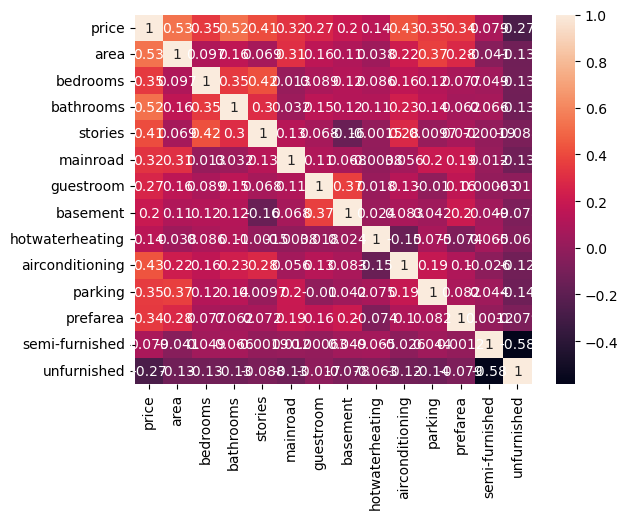

In [110]:
sns.heatmap(df_train.corr(), annot=True)

In [125]:
# creating X_train and y_train from df_train

y_train = df_train.pop('price')
X_train = df_train

X_train


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,0.118268,0.2,0.0,0.000000,1,0,0,0,0,0.000000,0,0,1
53,0.291623,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,1,0
350,0.139388,0.2,0.0,0.333333,1,0,0,1,0,0.333333,0,1,0
79,0.366420,0.4,0.5,0.666667,1,1,0,0,1,0.000000,0,0,0


In [113]:
X_train_sm=sm.add_constant(X_train['area'])

In [114]:
X_train_sm

,const,area
359,1.0,0.155227
19,1.0,0.403379
159,1.0,0.115628
35,1.0,0.454417
28,1.0,0.538015
...,...,...
526,1.0,0.118268
53,1.0,0.291623
350,1.0,0.139388
79,1.0,0.366420


In [115]:
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.params

const    0.126894
area     0.462192
dtype: float64

In [87]:
lr_model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      0   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     149.6
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           3.15e-29
Time:                        20:44:20   Log-Likelihood:                 227.23
No. Observations:                 381   AIC:                            -450.5
Df Residuals:                     379   BIC:                            -442.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1269      0.013      9.853      0.000       0.102       0.152
area           0.4622      0.038     12.232      0.000       0.388       0.536
==============================================================================
Omnibus:                       67.313   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.063
Skew:                           0.925   Prob(JB):                     8.59e-32
Kurtosis:                       5.365   Cond. No.                         5.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
# adding another variable - this is done by checking the correlation map. select the highest corr.

X_train_sm=sm.add_constant(X_train[['area', 'bathrooms']])


In [91]:
X_train_sm

,const,area,bathrooms
359,1.0,0.155227,0.0
19,1.0,0.403379,0.5
159,1.0,0.115628,0.5
35,1.0,0.454417,0.5
28,1.0,0.538015,0.5
...,...,...,...
526,1.0,0.118268,0.0
53,1.0,0.291623,0.5
350,1.0,0.139388,0.0
79,1.0,0.366420,0.5


In [117]:
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.params

const        0.104589
area         0.398396
bathrooms    0.298374
dtype: float64

In [94]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     174.1
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           2.51e-54
Time:                        20:51:01   Log-Likelihood:                 288.24
No. Observations:                 381   AIC:                            -570.5
Df Residuals:                     378   BIC:                            -558.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1046      0.011      9.384      0.000       0.083       0.127
area           0.3984      0.033     12.192      0.000       0.334       0.463
bathrooms      0.2984      0.025     11.945      0.000       0.249       0.347
==============================================================================
Omnibus:                       62.839   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.790
Skew:                           0.784   Prob(JB):                     2.23e-37
Kurtosis:                       5.859   Cond. No.                         6.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [118]:
X_train_sm=sm.add_constant(X_train[['area', 'bathrooms', 'bedrooms']])

In [119]:
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.params

const        0.041352
area         0.392211
bathrooms    0.259978
bedrooms     0.181863
dtype: float64

In [97]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     128.2
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           3.12e-57
Time:                        21:17:39   Log-Likelihood:                 297.76
No. Observations:                 381   AIC:                            -587.5
Df Residuals:                     377   BIC:                            -571.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0414      0.018      2.292      0.022       0.006       0.077
area           0.3922      0.032     12.279      0.000       0.329       0.455
bathrooms      0.2600      0.026     10.033      0.000       0.209       0.311
bedrooms       0.1819      0.041      4.396      0.000       0.101       0.263
==============================================================================
Omnibus:                       50.037   Durbin-Watson:                   2.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.806
Skew:                           0.648   Prob(JB):                     7.92e-28
Kurtosis:                       5.487   Cond. No.                         8.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [130]:
X_train
#Another way would be add all the columns to the model and remove one by one.
X_train_sm = sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           8.83e-83
Time:                        22:19:27   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367   BIC:                            -680.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0200      0.021      0.955      0.340      -0.021       0.061
area                0.2347      0.030      7.795      0.000       0.175       0.294
bedrooms            0.0467      0.037      1.267      0.206      -0.026       0.119
bathrooms           0.1908      0.022      8.679      0.000       0.148       0.234
stories             0.1085      0.019      5.661      0.000       0.071       0.146
mainroad            0.0504      0.014      3.520      0.000       0.022       0.079
guestroom           0.0304      0.014      2.233      0.026       0.004       0.057
basement            0.0216      0.011      1.943      0.053      -0.000       0.043
hotwaterheating     0.0849      0.022      3.934      0.000       0.042       0.127
airconditioning     0.0669      0.011      5.899      0.000       0.045       0.089
parking             0.0607      0.018      3.365      0.001       0.025       0.096
prefarea            0.0594      0.012      5.040      0.000       0.036       0.083
semi-furnished      0.0009      0.012      0.078      0.938      -0.022       0.024
unfurnished        -0.0310      0.013     -2.440      0.015      -0.056      -0.006
==============================================================================
Omnibus:                       93.687   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.917
Skew:                           1.091   Prob(JB):                     6.14e-67
Kurtosis:                       6.801   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Checking the p-value.. fir semi furnished its very high.. approaching 1, 
Following the .05 rule which is less that .05 is good and greater than that is no good.

We can now drop some variables as we have built with all variables here using
1. Significance(p-value)
2. List of VIF (1/(1-Rsq)) higher VIF means higher relatability to other vars.  




In [133]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['features'] = X_train.columns
vif['vif'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['vif'] = round(vif['vif'],2)
vif=vif.sort_values(by='vif',ascending=False)
vif


,features,vif
1,bedrooms,7.33
4,mainroad,6.02
0,area,4.67
3,stories,2.70
11,semi-furnished,2.19
9,parking,2.12
6,basement,2.02
12,unfurnished,1.82
8,airconditioning,1.77
2,bathrooms,1.67


Situationm Comparison 
1. High p-val + high VIF  [Remove at once]
2. Mixed
    - High p-val and Low VIF [Remove and recalculate VIF]
    - Low p-Val and High VIF [Remove these if the VIF does not come down after above deletion]
3. Low p-val and low VIF


In [134]:
X_train_cleaned=X_train.drop('semi-furnished',axis=1)
#creating another model with sme-fur dropped.


In [135]:
X_train_sm = sm.add_constant(X_train_cleaned)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     65.61
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           1.07e-83
Time:                        22:53:18   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -737.6
Df Residuals:                     368   BIC:                            -686.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0207      0.019      1.098      0.273      -0.016       0.058
area                0.2344      0.030      7.845      0.000       0.176       0.293
bedrooms            0.0467      0.037      1.268      0.206      -0.026       0.119
bathrooms           0.1909      0.022      8.697      0.000       0.148       0.234
stories             0.1085      0.019      5.669      0.000       0.071       0.146
mainroad            0.0504      0.014      3.524      0.000       0.022       0.079
guestroom           0.0304      0.014      2.238      0.026       0.004       0.057
basement            0.0216      0.011      1.946      0.052      -0.000       0.043
hotwaterheating     0.0849      0.022      3.941      0.000       0.043       0.127
airconditioning     0.0668      0.011      5.923      0.000       0.045       0.089
parking             0.0608      0.018      3.372      0.001       0.025       0.096
prefarea            0.0594      0.012      5.046      0.000       0.036       0.083
unfurnished        -0.0316      0.010     -3.096      0.002      -0.052      -0.012
==============================================================================
Omnibus:                       93.538   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              303.844
Skew:                           1.090   Prob(JB):                     1.05e-66
Kurtosis:                       6.794   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [136]:
vif=pd.DataFrame()
vif['features'] = X_train_cleaned.columns
vif['vif'] = [variance_inflation_factor(X_train_cleaned.values,i) for i in range(X_train_cleaned.shape[1])]
vif['vif'] = round(vif['vif'],2)
vif=vif.sort_values(by='vif',ascending=False)
vif

,features,vif
1,bedrooms,6.59
4,mainroad,5.68
0,area,4.67
3,stories,2.69
9,parking,2.12
6,basement,2.01
8,airconditioning,1.77
2,bathrooms,1.67
10,prefarea,1.51
5,guestroom,1.47


In [137]:
X_train_cleaned=X_train.drop('bedrooms',axis=1)

In [138]:
X_train_sm = sm.add_constant(X_train_cleaned)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     65.20
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           2.35e-83
Time:                        22:57:26   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -735.9
Df Residuals:                     368   BIC:                            -684.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0351      0.017      2.032      0.043       0.001       0.069
area                0.2350      0.030      7.799      0.000       0.176       0.294
bathrooms           0.1964      0.022      9.114      0.000       0.154       0.239
stories             0.1178      0.018      6.643      0.000       0.083       0.153
mainroad            0.0488      0.014      3.419      0.001       0.021       0.077
guestroom           0.0301      0.014      2.207      0.028       0.003       0.057
basement            0.0239      0.011      2.179      0.030       0.002       0.045
hotwaterheating     0.0864      0.022      4.007      0.000       0.044       0.129
airconditioning     0.0666      0.011      5.870      0.000       0.044       0.089
parking             0.0629      0.018      3.495      0.001       0.027       0.098
prefarea            0.0597      0.012      5.055      0.000       0.036       0.083
semi-furnished      0.0008      0.012      0.067      0.947      -0.022       0.024
unfurnished        -0.0318      0.013     -2.504      0.013      -0.057      -0.007
==============================================================================
Omnibus:                       97.809   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              326.485
Skew:                           1.131   Prob(JB):                     1.27e-71
Kurtosis:                       6.930   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [139]:
vif=pd.DataFrame()
vif['features'] = X_train_cleaned.columns
vif['vif'] = [variance_inflation_factor(X_train_cleaned.values,i) for i in range(X_train_cleaned.shape[1])]
vif['vif'] = round(vif['vif'],2)
vif=vif.sort_values(by='vif',ascending=False)
vif

,features,vif
3,mainroad,5.53
0,area,4.55
2,stories,2.24
8,parking,2.11
10,semi-furnished,1.97
5,basement,1.90
7,airconditioning,1.77
11,unfurnished,1.62
1,bathrooms,1.61
9,prefarea,1.51


# 4.Residual Analysis


In [141]:
y_train_pred = lr_model.predict(X_train_sm)

<Axes: ylabel='Density'>

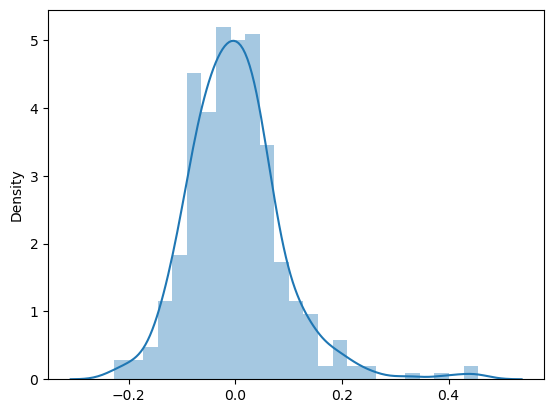

In [142]:
res=y_train-y_train_pred
sns.distplot(res)

# Predicting the test set

In [145]:
# but have to be transformed like train set. 

df_test[num_var] = scaler.fit_transform(df_test[num_var])
df_test


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,0.247651,0.084536,0.333333,0.000000,0.333333,1,0,0,0,0,0.000000,1,1,0
54,0.530201,0.298969,0.333333,0.333333,0.333333,1,1,0,0,1,0.333333,0,1,0
171,0.328859,0.592371,0.333333,0.000000,0.000000,1,0,0,0,0,0.333333,1,1,0
244,0.261745,0.252234,0.333333,0.000000,0.333333,1,1,1,0,0,0.000000,1,1,0
268,0.245638,0.226804,0.666667,0.000000,0.333333,1,0,0,0,1,0.000000,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.154362,0.020619,0.333333,0.333333,0.333333,1,0,1,0,0,0.000000,1,0,1
191,0.308725,0.621993,0.333333,0.000000,0.333333,1,1,1,0,0,0.000000,0,1,0
310,0.221477,0.297938,0.333333,0.000000,0.000000,1,0,1,0,0,0.000000,0,1,0
46,0.546980,0.298969,0.333333,0.333333,1.000000,1,0,0,0,1,0.333333,0,0,0


In [146]:
y_test_=df_test.pop('price')
X_test = df_test

In [159]:
X_test_sm = sm.add_constant(X_test)

In [161]:
X_test_sm=X_test_sm.drop(['bedrooms'], axis=1)
X_test_sm

,const,area,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,1.0,0.084536,0.000000,0.333333,1,0,0,0,0,0.000000,1,1,0
54,1.0,0.298969,0.333333,0.333333,1,1,0,0,1,0.333333,0,1,0
171,1.0,0.592371,0.000000,0.000000,1,0,0,0,0,0.333333,1,1,0
244,1.0,0.252234,0.000000,0.333333,1,1,1,0,0,0.000000,1,1,0
268,1.0,0.226804,0.000000,0.333333,1,0,0,0,1,0.000000,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1.0,0.020619,0.333333,0.333333,1,0,1,0,0,0.000000,1,0,1
191,1.0,0.621993,0.000000,0.333333,1,1,1,0,0,0.000000,0,1,0
310,1.0,0.297938,0.000000,0.000000,1,0,1,0,0,0.000000,0,1,0
46,1.0,0.298969,0.333333,1.000000,1,0,0,0,1,0.333333,0,0,0


In [162]:
y_test_pred=lr_model.predict(X_test_sm)
# X_train_sm

# Forward Selection and Backward selection that what we did.

In [170]:
y_test_pred

265    0.203522
54     0.377366
171    0.304536
244    0.296917
268    0.243900
         ...   
413    0.245289
191    0.324148
310    0.178661
46     0.425019
50     0.409516
Length: 164, dtype: float64

# R F E
## Recursive Feature Selection

In [163]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [166]:
lm=LinearRegression()
lm.fit(X_train,y_train)

rfe=RFE(lm,n_features_to_select=10)
rfe=rfe.fit(X_train,y_train)

In [168]:
list(zip(X_train.columns[rfe.support_]))
# rfe.support_

[('area',),
 ('bedrooms',),
 ('bathrooms',),
 ('stories',),
 ('mainroad',),
 ('guestroom',),
 ('hotwaterheating',),
 ('airconditioning',),
 ('parking',),
 ('prefarea',)]

In [169]:
X_train.columns[~rfe.support_]

Index(['basement', 'semi-furnished', 'unfurnished'], dtype='object')

In [ ]:
# It would be good to build model with support_ columns. 